# Algorithms: $k$-mean clustering

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

*Required functions*

In [3]:
def make_blobs(N=150, k=3, d=2, seed=None):
    """
    Input:
        N: an integer, number of samples
        k: an integer, number of blobs
        d: an integer, dimension of the space
    Output:
        a dataset X of shape (N, d)
    """
    np.random.seed(seed)
    X = np.random.randn(N,d)
    blob_size = N // k
    centers = np.random.randn(k, d) * 3
    for i in range(k):
        left = blob_size * i
        right = blob_size * (i+1) if i != k-1 else N
        X[left:right] += centers[i]
    return X

In [4]:
def dist_mtx(X1, X2):
    """
    Input:
        X1, X2: two datasets with the same number of features
    Output:
        an array of shape (N1, N2)  
        whose i,j-entry is the distance between X1[i] and X2[j]  
        where N1, N2 are the number of samples of X1, X2, respectively.
    """
    X1_col = X1[:, np.newaxis, :]
    X2_row = X2[np.newaxis, :, :]
    diff = X1_col - X2_row
    dist = np.sqrt( np.sum(diff**2, axis=-1) )
    return dist

# $k$-mean clustering  
Given an integer $k$,  
the **$k$-mean clustering** separates the dataset  
into $k$ groups.  

For each group, one may compute the center.  

The $k$-mean clustering repeats the following steps:  
1. each data point is labeled by the nearest group center.
2. compute the group centers.

![k-mean clustering](kmean.png "k-mean clustering")

### Algoritm
**Input**:  
a dataset `X` and an integer `k`  
(`X` has `N` samples and `d` features)  
**Output**:  
an array y of shape (N,)  
that records the labels of each sample  
(0, ..., k-1)

1. start with a random `y` whose entries are in 0, ..., k-1
2. use `y` to group data points in `X` and  
   and compute the group centers for each group
3. for each data point, compute the nearest center  
   and assign this data point  
   to the group with this center  
4. repeat Step 2 and Step 3 and  
   stop when `new_y` and `y` are the same.

### Pseudocode
**Input**:  
X: array, an dataset of N samples and d features  
k: integer, the number of groups for clustering  
**Output**:  
an array y of shape (N,)  
that records the labels of each sample  
(0, ..., k-1)  
```Python
N,d = X.shape

y = np.random.randint(0, k, N)
again = True
while again:
    again = False
    centers = k x d array whose i-th row is the center for the i-th group
    dist = dist_mtx(X, centers)
    new_y = new labels given by centers
    if not np.all(y == new_y):
        again = True
        y = new_y
```

##### Exercise
Run the code below.
```Python
N,d,k = 150, 2, 3
X = make_blobs(N, d)
y = np.random.randint(0, k, N)
```
Draw the points in `X` and color it by `y`.

In [ ]:
### your answer here


##### Exercise
Run the code below.
```Python
N,d,k = 150, 2, 3
X = make_blobs(N, d)
y = np.random.randint(0, k, N)
```
Use `mask = (y == 0)` to select  
points in `X` in group `0`.  

Then compute the center of this group.

In [ ]:
### your answer here


##### Exercise
Run the code below.
```Python
N,d,k = 150, 2, 3
X = make_blobs(N, d)
y = np.random.randint(0, k, N)
```
Create `centers` whose `i`-th  
is the center of the `i`-th group.

In [ ]:
### your answer here


##### Exercise
Run the code below.
```Python
N,d,k = 150, 2, 3
X = make_blobs(N, d)
centers = np.random.randn(k, d)
```
Use `dist_mtx` and `argmin`  
to find `new_y` such that  
the center for group `new_y[i]`  
is the nearest center for `X[i]`.

In [ ]:
### your answer here


##### Exercise
Let `X = make_blobs()`.  
Apply run the $k$-mean clustering algorithm  
on `X` with `k = 3`.

In [ ]:
### your answer here


##### Exercise
Write a function `kmean_clustering(X, k)`  
that returns the final label `y`  
given by the $k$-mean clustering algorithm.

In [ ]:
### your answer here


##### Sample code for $k$-mean clustering

In [115]:
def kmean_clustering(X, k, each_step=False):
    """
    Input:
        X: array, an dataset of  
           N samples and d features
        k: integer, the number of groups for clustering
        each_step: if True, return y for each step;
                   otherwise, return the final y.
    Output:
        an array y of shape (N,)  
        that records the labels of each sample  
        (0, ..., k-1)
    """
    N,d = X.shape
    
    ### initialize y and center
    y = np.random.randint(0, k, N)
    centers = np.zeros((k, d))
    
    ### Use Y to record y at each step
    Y = y[np.newaxis, :]
    
    again = True
    while again:
        again = False
        
        ### compute the centers
        y = Y[-1]
        for i in range(k):
            mask = (y == i)
            centers[i] = X[mask].mean(axis=0)
        
        ### generate new_y
        dist = dist_mtx(X, centers)
        new_y = dist.argmin(axis=1)
        
        if not np.all(y == new_y):
            Y = np.vstack([Y, new_y])
            again = True
    
    if each_step:
        return Y
    else:
        return Y[-1]

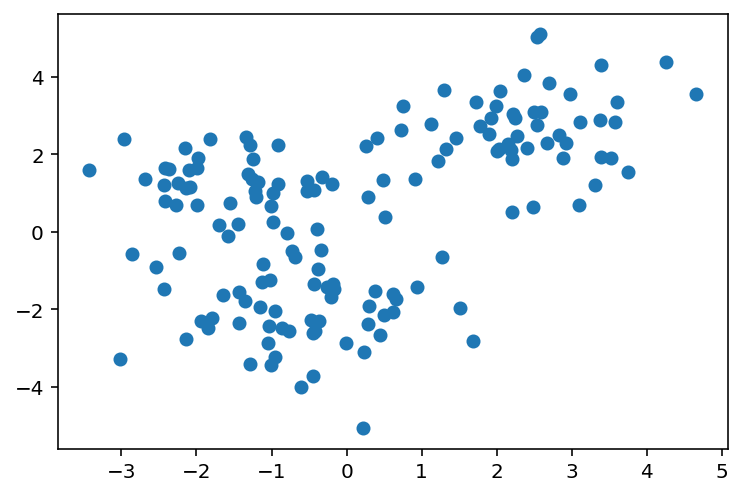

In [125]:
np.random.seed(10)
X = make_blobs()
np.random.seed(None)
plt.scatter(X[:,0], X[:,1])

In [126]:
Y = kmean_clustering(X, 3, each_step=True)

In [127]:
Y.shape

(6, 150)

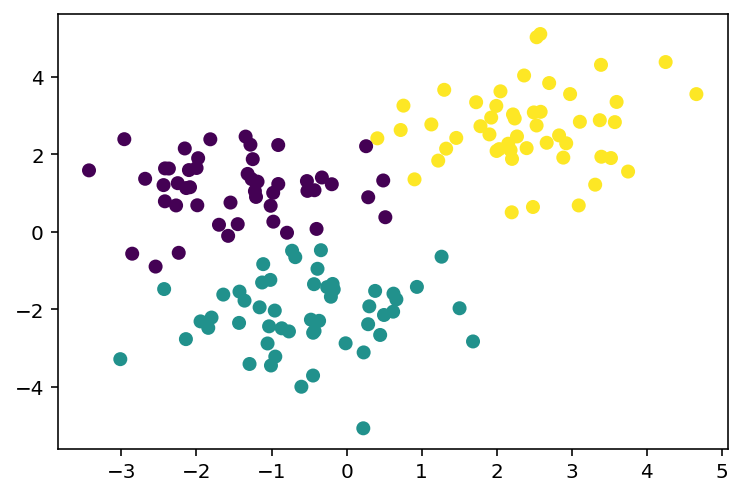

In [129]:
i = 5
plt.scatter(X[:,0], X[:,1], c=Y[i], cmap='viridis')

##### Code for generating the figure

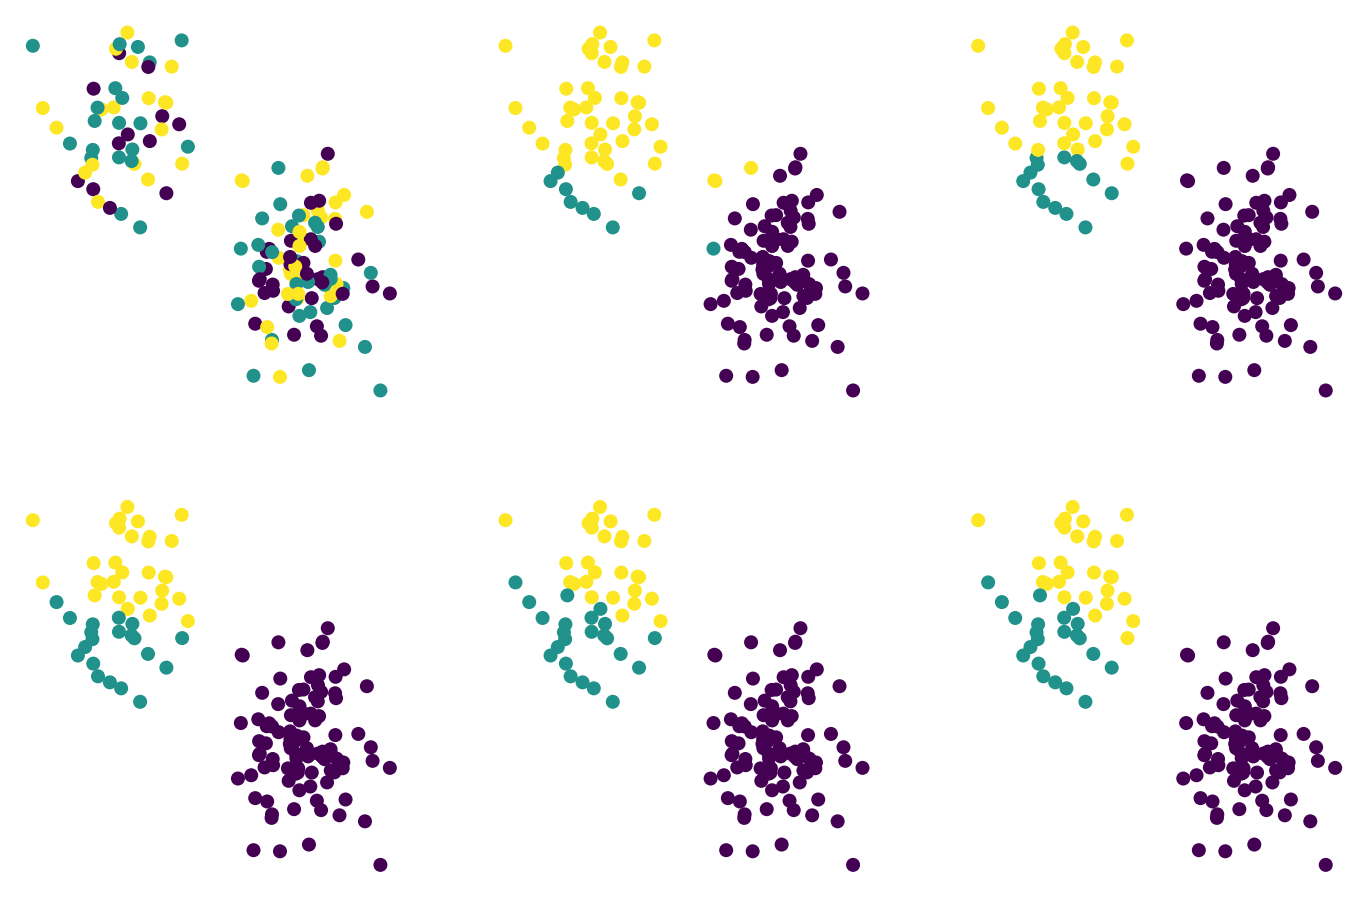

In [162]:
import math

X = make_blobs(seed=11)

Y = kmean_clustering(X, 3, each_step=True)
s = Y.shape[0]
h = math.ceil(s/3)

fig = plt.figure(figsize=(3*4,h*4))
axs = fig.subplots(h,3)
for i in range(h):
    for j in range(3):
        axs[i,j].axis('off')
        step = i*3 + j
        if step < s:
            axs[i,j].scatter(X[:,0], X[:,1], c=Y[step], cmap='viridis')
            
fig.savefig('kmean.png')